# Lab 3: Image Thresholding and Image Masking

### 1. Image Thresholding
Thresholding is a simple, yet effective technique for segmentation. It helps in separating objects from the background by converting a grayscale image to binary.

**Use in Real Life:**
- Text extraction (OCR)

- Document scanning

- Medical imaging (tumor detection)

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

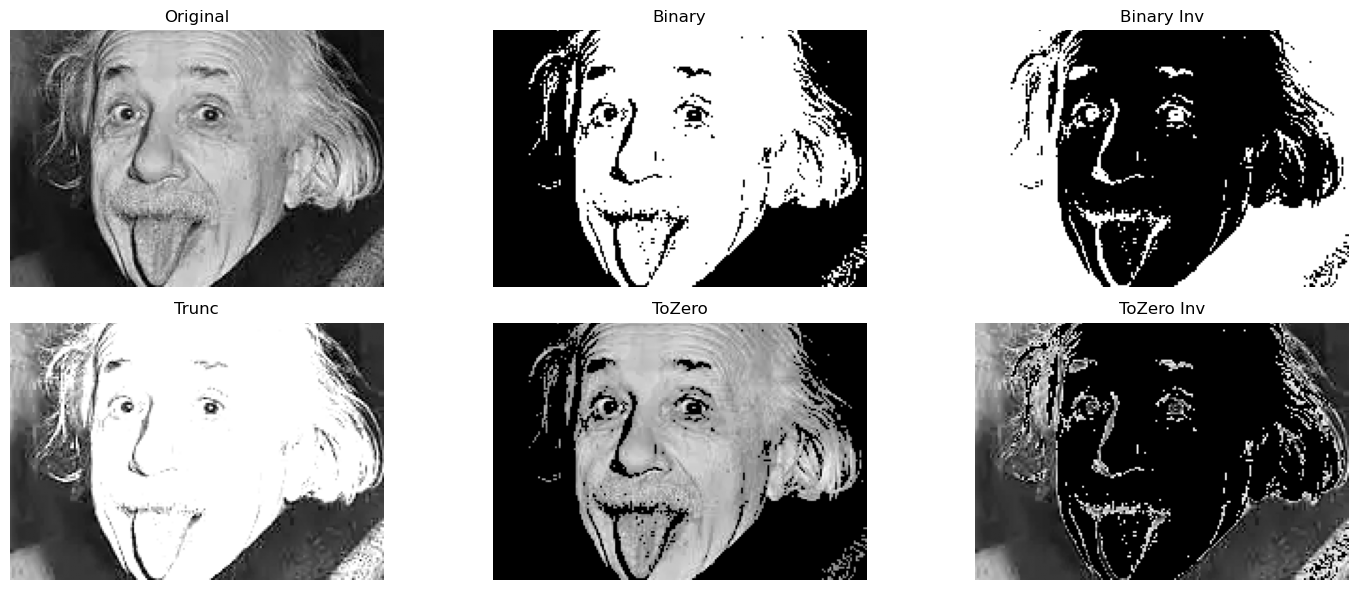

In [6]:
img = cv2.imread('einstein.png', cv2.IMREAD_GRAYSCALE)

_, th_binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, th_binary_inv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, th_trunc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, th_tozero = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, th_tozero_inv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original', 'Binary', 'Binary Inv', 'Trunc', 'ToZero', 'ToZero Inv']
images = [img, th_binary, th_binary_inv, th_trunc, th_tozero, th_tozero_inv]

plt.figure(figsize=(15, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


### 2. Image Masking
Masking is used to extract or manipulate a region of interest (ROI) from an image using a binary mask. A mask is a binary image (same size), where white = keep pixel, and black = ignore.

**Use in Real Life:**
Focused filtering (only apply filters to part of an image)

Region-based analysis (detect vehicles, tumors, etc.)

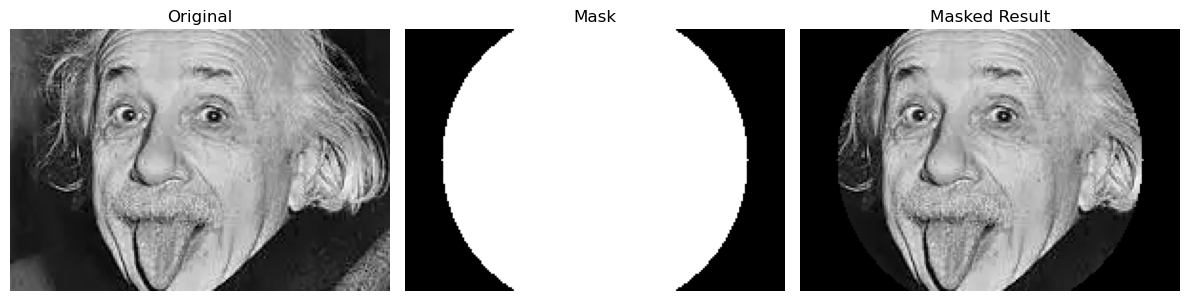

In [7]:
import numpy as np

img_color = cv2.imread('einstein.png')

mask = np.zeros(img_color.shape[:2], dtype=np.uint8)


center = (img_color.shape[1] // 2, img_color.shape[0] // 2)
radius = 80
cv2.circle(mask, center, radius, 255, -1)


masked_result = cv2.bitwise_and(img_color, img_color, mask=mask)


plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(masked_result, cv2.COLOR_BGR2RGB))
plt.title("Masked Result")
plt.axis('off')
plt.tight_layout()
plt.show()
